<img src="images/csdms_logo.jpg">

## Flexural Subsidence
This example explores how to use a BMI implementation using sedflux's subsidence model as an example.

### Links
* [sedflux source code](https://github.com/mcflugen/sedflux): Look at the files that have *deltas* in their name.
* [sedflux description on CSDMS](https://csdms.colorado.edu/wiki/Model_help:Sedflux): Detailed information on the CEM model.

### Interacting with the Subside BMI using Python

Some magic that allows us to view images within the notebook.

In [1]:
from __future__ import print_function

%matplotlib inline

import matplotlib.pyplot as plt

Import the `Subside` class, and instantiate it. In Python, a model with a BMI will have no arguments for its constructor. Note that although the class has been instantiated, it's not yet ready to be run. We'll get to that later!

In [2]:
from pymt import plugins
subside = plugins.Subside()

✓ Avulsion
✓ Plume
✓ Sedflux3D
✓ Subside
✓ Hydrotrend
✓ FrostNumber
✓ Ku
✓ Cem
✓ Waves
✓ Child


Even though we can't run our waves model yet, we can still get some information about it. *Just don't try to run it.* Some things we can do with our model are get the names of the input variables.

In [3]:
subside.output_var_names

('lithosphere__increment_of_elevation',)

In [4]:
subside.input_var_names

('earth_material_load__pressure',)

We can also get information about specific variables. Here we'll look at some info about lithospheric deflections. This is the main input of the Subside model. Notice that BMI components always use [CSDMS standard names](http://csdms.colorado.edu/wiki/CSDMS_Standard_Names). With that name we can get information about that variable and the grid that it is on.

OK. We're finally ready to run the model. Well not quite. First we initialize the model with the BMI **initialize** method. Normally we would pass it a string that represents the name of an input file. For this example we'll pass **None**, which tells Cem to use some defaults.

In [5]:
config_file, config_folder = subside.setup()

In [6]:
subside.initialize(config_file, dir=config_folder)

In [7]:
subside.var["earth_material_load__pressure"]

<DataValues>
float64 earth_material_load__pressure(node)
Attributes:
    units: Pa
    grid: 0
    intent: in
    location: node

In [8]:
subside.grid[0].node_shape

<xarray.DataArray 'node_shape' (rank: 2)>
array([500, 500], dtype=int32)
Dimensions without coordinates: rank

Before running the model, let's set an input parameter - the overlying load.

In [9]:
import numpy as np

load = np.zeros((500, 500))
load[250, 250] = 1e3

The main output variable for this model is *deflection*. In this case, the CSDMS Standard Name is:

    "lithosphere__increment_of_elevation"

First we find out which of Subside's grids contains deflection. 

In [10]:
subside.var['lithosphere__increment_of_elevation']

<DataValues>
float64 lithosphere__increment_of_elevation(node)
Attributes:
    units: m
    grid: 0
    intent: out
    location: node

With the *grid_id*, we can now get information about the grid. For instance, the number of dimension and the type of grid (structured, unstructured, etc.). This grid happens to be *uniform rectilinear*. If you were to look at the "grid" types for wave height and period, you would see that they aren't on grids at all but instead are scalars.

In [11]:
subside.grid[0]

<xarray.Dataset>
Dimensions:                 (face: 249001, node: 250000, rank: 2, vertex: 996004)
Dimensions without coordinates: face, node, rank, vertex
Data variables:
    mesh                    int64 0
    node_shape              (rank) int32 500 500
    node_spacing            (rank) float64 500.0 500.0
    node_origin             (rank) float64 -1.0 -1.0
    node_y                  (node) float64 -1.0 -1.0 ... 2.495e+05 2.495e+05
    node_x                  (node) float64 -1.0 499.0 ... 2.49e+05 2.495e+05
    face_node_connectivity  (vertex) int64 794 793 293 ... 249775 249275 249276
    face_node_offset        (face) int32 4 8 12 16 ... 995996 996000 996004

Because this grid is uniform rectilinear, it is described by a set of BMI methods that are only available for grids of this type. These methods include:
* get_grid_shape
* get_grid_spacing
* get_grid_origin

Allocate memory for the water depth grid and get the current values from `cem`.

In [12]:
subside.set_value("earth_material_load__pressure", load)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [13]:
subside.update()

In [14]:
dz = subside.get_value('lithosphere__increment_of_elevation')

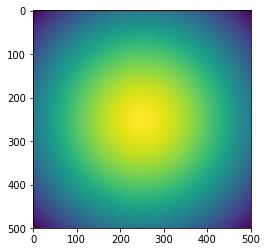

In [15]:
plt.imshow(dz.reshape((500, 500)))

In [16]:
load[125, 125] = 2e3
subside.set_value("earth_material_load__pressure", load)
subside.update()

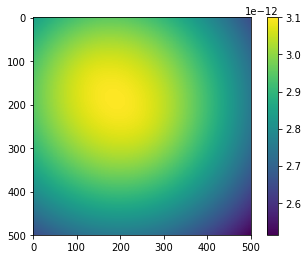

In [18]:
dz = subside.get_value('lithosphere__increment_of_elevation')
plt.imshow(dz.reshape((500, 500)))
plt.colorbar()